In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',100)

# Data Reading

In [21]:
data =pd.read_csv('credit.csv')
data.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,63408.0,-1.132677,0.615652,1.464376,0.794720,-0.002052,1.165955,-0.421731,0.894981,0.216008,-0.613336,-2.097297,-0.218216,0.076213,-0.114768,0.717721,-0.052179,-0.015900,0.289907,0.766720,0.225196,-0.003153,0.038276,-0.185248,-1.338119,0.149134,-0.196059,0.293304,0.065966,48.00,0
1,1,129157.0,1.949088,-0.173631,-1.290576,0.863436,-0.399768,-1.826996,0.444184,-0.392352,0.575581,0.165744,-0.385962,-0.343529,-2.175720,0.866259,-0.268317,-0.803918,0.393517,-0.944503,-0.260960,-0.341862,0.032756,0.153590,0.180652,0.872811,0.009710,0.330941,-0.096709,-0.064262,35.64,0
2,2,67623.0,-0.898489,-0.348237,3.126380,-1.968897,-1.014949,0.483739,-0.643849,0.458548,0.147475,-0.858576,-1.277969,-0.347276,-0.325318,-1.561326,-2.281050,0.805359,0.582837,-1.828785,-0.869040,-0.116261,0.213226,0.840346,-0.396982,0.131470,0.547205,-0.259076,0.086891,0.055913,4.60,0
3,3,147630.0,2.117921,-0.815617,-0.899881,-0.457396,-0.649465,-0.512657,-0.511257,-0.185319,-0.179076,0.771267,-1.588599,0.072502,0.612100,-0.159147,-0.053738,-1.192880,-0.307266,0.593334,-0.261948,-0.513285,-0.890817,-2.055234,0.494779,-0.729029,-0.691072,0.091499,-0.036171,-0.044267,40.46,0
4,4,63471.0,1.217274,-1.015679,-0.457817,-2.817000,-0.237332,0.421068,-0.392322,0.114610,0.575762,-0.978947,0.656755,1.601932,1.094884,0.113042,1.892349,-4.344098,1.700924,-0.953552,-0.964073,-0.536448,-0.221950,0.272221,-0.050304,-0.907757,0.612726,-0.535802,0.144996,0.007662,35.88,0


In [22]:
data =data.drop('Unnamed: 0',axis=1)
data.shape

(1000, 31)

In [23]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

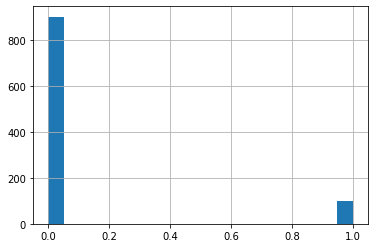

In [24]:
#Looking for balanced or imbalanced
data['Class'].hist(bins=20, figsize=(6,4))

This is imbalnced data

In [25]:
data.Class.value_counts()

0    900
1    100
Name: Class, dtype: int64

In [26]:
#Lets Split the data to avoid data leakage
msk = np.random.rand(len(data)) < 0.8

train = data[msk]

test = data[~msk]

train.shape ,test.shape

((773, 31), (227, 31))

In [27]:
train.Class.value_counts(),test.Class.value_counts()

(0    694
 1     79
 Name: Class, dtype: int64, 0    206
 1     21
 Name: Class, dtype: int64)

In [29]:
#Null value verification
train.isnull().sum() , test.isnull().sum() 

(Time      0
 V1        0
 V2        0
 V3        0
 V4        0
 V5        0
 V6        0
 V7        0
 V8        0
 V9        0
 V10       0
 V11       0
 V12       0
 V13       0
 V14       0
 V15       0
 V16       0
 V17       0
 V18       0
 V19       0
 V20       0
 V21       0
 V22       0
 V23       0
 V24       0
 V25       0
 V26       0
 V27       0
 V28       0
 Amount    0
 Class     0
 dtype: int64, Time      0
 V1        0
 V2        0
 V3        0
 V4        0
 V5        0
 V6        0
 V7        0
 V8        0
 V9        0
 V10       0
 V11       0
 V12       0
 V13       0
 V14       0
 V15       0
 V16       0
 V17       0
 V18       0
 V19       0
 V20       0
 V21       0
 V22       0
 V23       0
 V24       0
 V25       0
 V26       0
 V27       0
 V28       0
 Amount    0
 Class     0
 dtype: int64)

In [32]:
#Correlation with target
cr=train.corr()
cr.Class

Time     -0.078056
V1       -0.490136
V2        0.534790
V3       -0.659403
V4        0.647161
V5       -0.471443
V6       -0.288231
V7       -0.575309
V8        0.007235
V9       -0.493580
V10      -0.705555
V11       0.681511
V12      -0.751988
V13      -0.020988
V14      -0.823401
V15      -0.048091
V16      -0.685291
V17      -0.684667
V18      -0.501505
V19       0.276025
V20       0.148308
V21       0.203309
V22      -0.020128
V23       0.024687
V24      -0.040969
V25       0.028558
V26       0.011802
V27       0.002317
V28       0.099724
Amount    0.078320
Class     1.000000
Name: Class, dtype: float64

In [34]:
#Low corrleated variables with target

del_cols = [col for col in cr.Class.index if cr.Class[col]<=0.05 and cr.Class[col]>=-0.05 ]
del_cols

['V8', 'V13', 'V15', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27']

In [96]:
train1= train.drop(del_cols, axis=1)
test1= test.drop(del_cols, axis=1)

In [97]:
#List tightly correlated items

def multi_crr(X):
    crr=X.corr()
    crr_variables=[]
    crr_var=[]
    cols_list=crr.columns.to_list()
    for i in cols_list:
        val=0
        for j in cols_list:
            if i!=j:
                if crr[i][j]>0.8:
                    if ([i,j] not in crr_variables) and ([j,i] not in crr_variables):
                                crr_variables.append([i,j])
                                cols_list.remove(j)
                                
    output = []
    for x in crr_variables:
        if x[1] not in output:
            output.append(x[1])                            
    return output

In [98]:
crr_var=multi_crr(train1.drop('Class',axis=1))
crr_var

['V17']

In [99]:
train1= train1.drop(crr_var, axis=1)
test1= test1.drop(crr_var, axis=1)

In [177]:
#Data Partition
X_train=train1.drop('Class',axis=1)
y_train=train1['Class']

X_test =test1.drop('Class',axis=1)
y_test =test1['Class']

In [178]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [102]:
#Kfold Cross Validation
from sklearn.model_selection import KFold,cross_val_score
kf = KFold(n_splits=5, random_state=42, shuffle=False)

In [232]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,roc_curve ,auc
from sklearn.metrics import precision_recall_curve,precision_score,recall_score,f1_score,classification_report

def model_build(X, y,X_test,y_test, model):
    
    model.fit(X,y)
    #Prediction
    y_pred = model.predict(X_test)    
    print('Confusion matrix:  \n', confusion_matrix(y_test,y_pred))
    print('accuracy_score   :   ', accuracy_score(y_test,y_pred))
    print('Precision Score:' , precision_score(y_test,y_pred)) #For imbalnced data Precision,Recall score is more suitable than Accuracy
    print('Recall Score:' , recall_score(y_test,y_pred))
    print('F1 Score:' , f1_score(y_test,y_pred))
    print('\n Classification Report:' , classification_report(y_test,y_pred))
    
    print('AUROC Curve:\n')
    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.show()
    auc_score = roc_auc_score(y_test, probs)
    print('AUC: %.3f' % auc_score)
    
    print('\nPrecision-Recall curve:\n') #For imbalnced data PR curve is more suitable than ROC
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    auc_score = auc(recall, precision)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    plt.plot(recall, precision, marker='.')
    plt.show()
    print('AUC: %.3f' % auc_score)


# Baseline (no oversampling)

Confusion matrix:  
 [[205   1]
 [  4  17]]
accuracy_score   :    0.9779735682819384
Precision Score: 0.9444444444444444
Recall Score: 0.8095238095238095
F1 Score: 0.8717948717948718

 Classification Report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99       206
           1       0.94      0.81      0.87        21

    accuracy                           0.98       227
   macro avg       0.96      0.90      0.93       227
weighted avg       0.98      0.98      0.98       227

AUROC Curve:



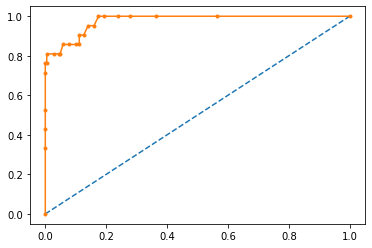

AUC: 0.978

Precision-Recall curve:



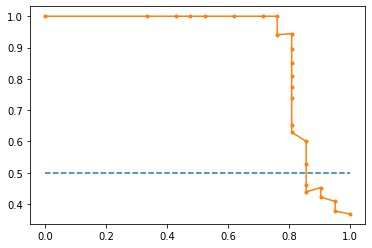

AUC: 0.895


In [104]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
model_build(X_train,y_train,X_test,y_test, RF)

In [203]:
#K fold Cross validation with RF
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall' ) #This is imblanced data ,So we have to consider Recall score to meassure the performance of the model

array([1.        , 0.8125    , 0.86666667, 1.        , 0.83333333])

These are decent results, and we haven't even optimized the model! Let's do some hyperparameter tuning:

In [207]:
#Hyper parameter tuning
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100,150, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13],
    'bootstrap':[True,False]
}

grid_no_up = GridSearchCV(rf, param_grid=params, cv=kf, 
                          scoring='recall').fit(X_train, y_train)

grid_no_up.best_score_

0.9025000000000001

We have about 90% recall on one of our models before we have tried oversampling. Now have to validate on our test data

In [209]:
recall_score(y_test, grid_no_up.predict(X_test))

0.7619047619047619

# Oversampling With SMOTE

Confusion matrix:  
 [[203   3]
 [  5  16]]
accuracy_score   :    0.9647577092511013
Precision Score: 0.8421052631578947
Recall Score: 0.7619047619047619
F1 Score: 0.8

 Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.98       206
           1       0.84      0.76      0.80        21

    accuracy                           0.96       227
   macro avg       0.91      0.87      0.89       227
weighted avg       0.96      0.96      0.96       227

AUROC Curve:



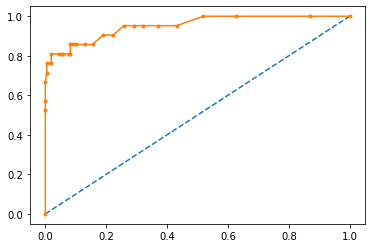

AUC: 0.952

Precision-Recall curve:



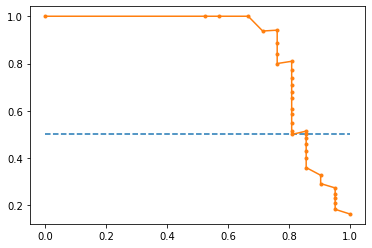

AUC: 0.858


In [211]:
X_train_upsample, y_train_upsample = SMOTE(random_state=42).fit_sample(X_train, y_train)
model_build(X_train_upsample,y_train_upsample,X_test,y_test,rf)

# StratifiedKFold for imbalanced data with SMOTE oversampling

In [202]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

X_df =pd.DataFrame(X_train)
y_df =pd.DataFrame(y_train)


from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

scores=[]
cv = StratifiedKFold(n_splits=5)
for train_idx, test_idx, in cv.split(X_df, y_df):
    X_train1, y_train1 = X_df.iloc[train_idx], y_df.iloc[train_idx]
    X_test1, y_test1 = X_df.iloc[test_idx], y_df.iloc[test_idx]
    X_train1, y_train1 = SMOTE().fit_sample(X_train1, y_train1)
    rf.fit(X_train1, y_train1)
    # Score the model on the (non-upsampled) validation data
    score = recall_score(y_test1, rf.predict(X_test1))
    scores.append(score)
scores

[1.0, 0.875, 0.8125, 0.9333333333333333, 0.875]

Confusion matrix:  
 [[204   2]
 [  4  17]]
accuracy_score   :    0.973568281938326
Precision Score: 0.8947368421052632
Recall Score: 0.8095238095238095
F1 Score: 0.8500000000000001

 Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.99       206
           1       0.89      0.81      0.85        21

    accuracy                           0.97       227
   macro avg       0.94      0.90      0.92       227
weighted avg       0.97      0.97      0.97       227

AUROC Curve:



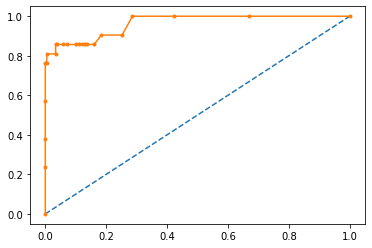

AUC: 0.964

Precision-Recall curve:



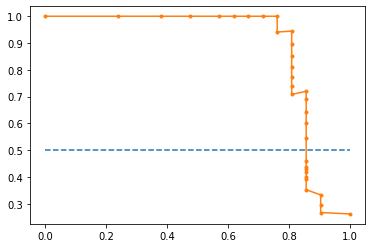

AUC: 0.882
Confusion matrix:  
 [[204   2]
 [  5  16]]
accuracy_score   :    0.9691629955947136
Precision Score: 0.8888888888888888
Recall Score: 0.7619047619047619
F1 Score: 0.8205128205128205

 Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.98       206
           1       0.89      0.76      0.82        21

    accuracy                           0.97       227
   macro avg       0.93      0.88      0.90       227
weighted avg       0.97      0.97      0.97       227

AUROC Curve:



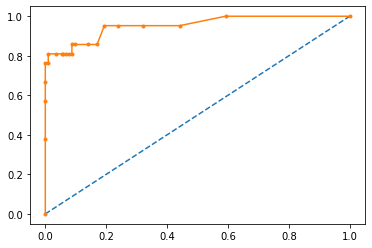

AUC: 0.953

Precision-Recall curve:



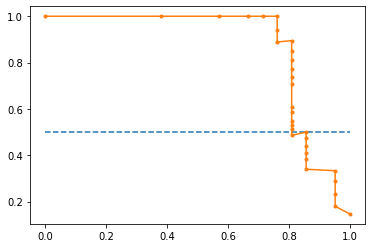

AUC: 0.868
Confusion matrix:  
 [[204   2]
 [  5  16]]
accuracy_score   :    0.9691629955947136
Precision Score: 0.8888888888888888
Recall Score: 0.7619047619047619
F1 Score: 0.8205128205128205

 Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.98       206
           1       0.89      0.76      0.82        21

    accuracy                           0.97       227
   macro avg       0.93      0.88      0.90       227
weighted avg       0.97      0.97      0.97       227

AUROC Curve:



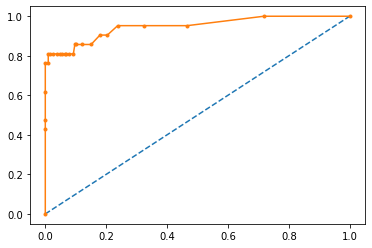

AUC: 0.948

Precision-Recall curve:



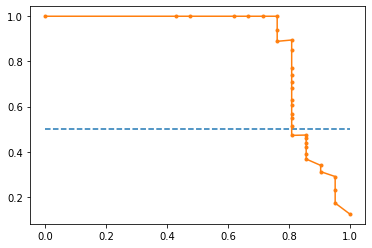

AUC: 0.865
Confusion matrix:  
 [[204   2]
 [  5  16]]
accuracy_score   :    0.9691629955947136
Precision Score: 0.8888888888888888
Recall Score: 0.7619047619047619
F1 Score: 0.8205128205128205

 Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.98       206
           1       0.89      0.76      0.82        21

    accuracy                           0.97       227
   macro avg       0.93      0.88      0.90       227
weighted avg       0.97      0.97      0.97       227

AUROC Curve:



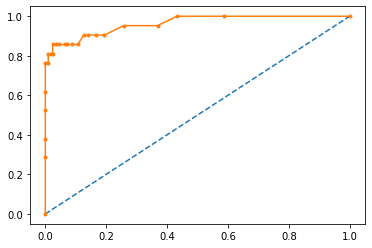

AUC: 0.963

Precision-Recall curve:



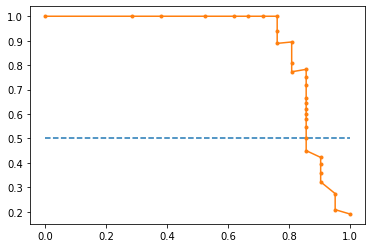

AUC: 0.886
Confusion matrix:  
 [[204   2]
 [  4  17]]
accuracy_score   :    0.973568281938326
Precision Score: 0.8947368421052632
Recall Score: 0.8095238095238095
F1 Score: 0.8500000000000001

 Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.99       206
           1       0.89      0.81      0.85        21

    accuracy                           0.97       227
   macro avg       0.94      0.90      0.92       227
weighted avg       0.97      0.97      0.97       227

AUROC Curve:



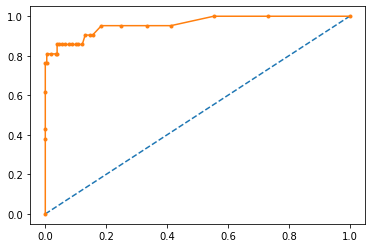

AUC: 0.961

Precision-Recall curve:



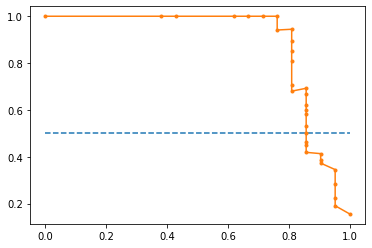

AUC: 0.885


In [206]:
scores=[]
cv = StratifiedKFold(n_splits=5)
for train_idx, test_idx, in cv.split(X_df, y_df):
    X_train1, y_train1 = X_df.iloc[train_idx], y_df.iloc[train_idx]
    X_test1, y_test1 = X_df.iloc[test_idx], y_df.iloc[test_idx]
    X_train1, y_train1 = SMOTE().fit_sample(X_train1, y_train1)
    model_build(X_train,y_train,X_test,y_test, rf)

# OverSampling with Cross Validation

In [174]:
#Treatment to to unbalancing
#oversampling minority class using smote
from imblearn.over_sampling import SMOTE

X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)


example_params = {
        'n_estimators': 100,
        'max_depth': 5,
        'random_state': 13
    }

def score_model(model, params, cv=None):
    """
    Creates folds manually, and upsamples within each fold.
    Returns an array of validation (recall) scores
    """
    if cv is None:
        cv = KFold(n_splits=5, random_state=42)

    smoter = SMOTE(random_state=42)
    
    scores = []

    for train_fold_index, val_fold_index in cv.split(X_train_df, y_train_df):
        # Get the training data
        X_train_fold, y_train_fold = X_train_df.iloc[train_fold_index], y_train_df.iloc[train_fold_index]
        # Get the validation data
        X_val_fold, y_val_fold = X_train_df.iloc[val_fold_index], y_train_df.iloc[val_fold_index]

        # Upsample only the data in the training section
        X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold,
                                                                           y_train_fold)
        # Fit the model on the upsampled training data
        model_obj = model(**params).fit(X_train_fold_upsample, y_train_fold_upsample)
        # Score the model on the (non-upsampled) validation data
        score = recall_score(y_val_fold, model_obj.predict(X_val_fold))
        scores.append(score)
    return np.array(scores)

# Example of the model in action
score_model(RandomForestClassifier, example_params, cv=kf)

array([1.        , 0.8125    , 0.86666667, 1.        , 0.83333333])

We can even do grid search this way by looping over the parameters. As a reminder, the parameter combinations we tried earlier were

In [195]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100,150, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13],
    'bootstrap':[True,False]
}

score_tracker = []
for n_estimators in params['n_estimators']:
    for max_depth in params['max_depth']:
        for bootstrap in params['bootstrap']:
            example_params = {
                'n_estimators': n_estimators,
                'max_depth': max_depth,
                'random_state': 13,
                'bootstrap':bootstrap
            }
            example_params['recall'] = score_model(RandomForestClassifier, 
                                                   example_params, cv=kf).mean()
            score_tracker.append(example_params)
        
# What's the best model?
sorted(score_tracker, key=lambda x: x['recall'], reverse=True)[0]

{'n_estimators': 50,
 'max_depth': 4,
 'random_state': 13,
 'bootstrap': True,
 'recall': 0.9025000000000001}

The best estimator has a recall score of 85% on the validation set. Let's see how this compares with the test score:

In [236]:
X_train_upsample, y_train_upsample = SMOTE(random_state=42).fit_sample(X_train, y_train)

rf = RandomForestClassifier(n_estimators=50, max_depth=4, random_state=13 ,bootstrap= True)
rf.fit(X_train_upsample, y_train_upsample)
recall_score(y_test, rf.predict(X_test))

0.8095238095238095

This is the final model which gives Recall score 80% on test data.